#Get Libraries and Data

In [ ]:
!wget -q https://archive.ics.uci.edu/static/public/22/chess+king+rook+vs+king+pawn.zip -O chess.zip
!unzip -q chess.zip

In [ ]:
!pip install pycaret

In [ ]:
import pandas as pd
from pycaret.classification import ClassificationExperiment
from pycaret.classification import *

In [ ]:
df = pd.read_csv('kr-vs-kp.data')

# Exploratory Data Analysis

## Peek at Data

In [ ]:
df.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
0,f,f,f,f,t,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
1,f,f,f,f,t,f,t,f,f,f,...,f,f,f,f,f,f,t,t,n,won
2,f,f,f,f,f,f,f,f,t,f,...,f,f,f,f,f,f,t,t,n,won
3,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
4,f,f,f,f,f,f,f,f,f,f,...,f,f,t,f,f,f,t,t,n,won


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3195 entries, 0 to 3194
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   f       3195 non-null   object
 1   f.1     3195 non-null   object
 2   f.2     3195 non-null   object
 3   f.3     3195 non-null   object
 4   f.4     3195 non-null   object
 5   f.5     3195 non-null   object
 6   f.6     3195 non-null   object
 7   f.7     3195 non-null   object
 8   f.8     3195 non-null   object
 9   f.9     3195 non-null   object
 10  f.10    3195 non-null   object
 11  f.11    3195 non-null   object
 12  l       3195 non-null   object
 13  f.12    3195 non-null   object
 14  n       3195 non-null   object
 15  f.13    3195 non-null   object
 16  f.14    3195 non-null   object
 17  t       3195 non-null   object
 18  f.15    3195 non-null   object
 19  f.16    3195 non-null   object
 20  f.17    3195 non-null   object
 21  f.18    3195 non-null   object
 22  f.19    3195 non-null   

## Statistical Summary

In [ ]:
df.describe()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
count,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195,...,3195,3195,3195,3195,3195,3195,3195,3195,3195,3195
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,f,f,t,t,n,won
freq,2838,2970,3075,2873,2128,1721,2025,2499,1979,2224,...,3194,3148,3059,2630,3020,1983,2006,2344,2406,1668


## Missing values

In [ ]:
df.isnull().sum()

f       0
f.1     0
f.2     0
f.3     0
f.4     0
f.5     0
f.6     0
f.7     0
f.8     0
f.9     0
f.10    0
f.11    0
l       0
f.12    0
n       0
f.13    0
f.14    0
t       0
f.15    0
f.16    0
f.17    0
f.18    0
f.19    0
f.20    0
f.21    0
t.1     0
f.22    0
f.23    0
f.24    0
f.25    0
f.26    0
f.27    0
f.28    0
t.2     0
t.3     0
n.1     0
won     0
dtype: int64

# Duplicate Entries

In [ ]:
df.duplicated().sum()

0

# PyCaret Model Intialization, Deplyoment and Comparison

## PyCaret - Setup initializes the training environment

In [ ]:
s = setup(df, target = 'won', session_id = 123)

,Description,Value
0,Session id,123
1,Target,won
2,Target type,Binary
3,Target mapping,"nowin: 0, won: 1"
4,Original data shape,"(3195, 37)"
5,Transformed data shape,"(3195, 39)"
6,Transformed train set shape,"(2236, 39)"
7,Transformed test set shape,"(959, 39)"
8,Ordinal features,34
9,Categorical features,36


#### The Transformed dataframe has 39 columns. The below steps check how the encoding was done

In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_test',
 'X_test_transformed',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'fix_imbalance',
 'fold_generator',
 'fold_groups_param',
 'fold_shuffle_param',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'target_param',
 'test',
 'test_transformed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables',
 'y',
 'y_test',
 'y_test_transformed',
 'y_train',
 'y_train_transformed',
 'y_transformed'}

In [ ]:
# lets access X_train_transformed
get_config('dataset_transformed')

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.23_f,f.24,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won
3039,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0
2188,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1
51,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1
2805,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3053,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
824,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
992,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
2494,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


The labels has been modified to integers by the function

In [ ]:
get_config('dataset_transformed').info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3195 entries, 3039 to 1245
Data columns (total 39 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f       3195 non-null   float64
 1   f.1     3195 non-null   float64
 2   f.2     3195 non-null   float64
 3   f.3     3195 non-null   float64
 4   f.4     3195 non-null   float64
 5   f.5     3195 non-null   float64
 6   f.6     3195 non-null   float64
 7   f.7     3195 non-null   float64
 8   f.8     3195 non-null   float64
 9   f.9     3195 non-null   float64
 10  f.10    3195 non-null   float64
 11  f.11    3195 non-null   float64
 12  l       3195 non-null   float64
 13  f.12    3195 non-null   float64
 14  n_n     3195 non-null   float64
 15  n_w     3195 non-null   float64
 16  n_b     3195 non-null   float64
 17  f.13    3195 non-null   float64
 18  f.14    3195 non-null   float64
 19  t       3195 non-null   float64
 20  f.15    3195 non-null   float64
 21  f.16    3195 non-null   float64
 2

Only the column 'n' has been modified based on one hot-encoding as it had 3 categorical variables (n,w and b). All the other columns has only two variables (t and f) and new columns were not required

## PyCaret - Compare models

In [ ]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
dt,Decision Tree Classifier,0.9933,0.9932,0.9933,0.9933,0.9933,0.9866,0.9866,0.4650
xgboost,Extreme Gradient Boosting,0.9915,0.9996,0.9915,0.9915,0.9915,0.9830,0.9830,0.4200
lightgbm,Light Gradient Boosting Machine,0.9915,0.9997,0.9915,0.9915,0.9915,0.9830,0.9830,0.9670
rf,Random Forest Classifier,0.9852,0.9988,0.9852,0.9854,0.9852,0.9704,0.9706,0.6070
et,Extra Trees Classifier,0.9848,0.9983,0.9848,0.9850,0.9848,0.9695,0.9697,0.6350
gbc,Gradient Boosting Classifier,0.9808,0.9978,0.9808,0.9813,0.9808,0.9615,0.9620,0.5610
ada,Ada Boost Classifier,0.9660,0.9935,0.9660,0.9664,0.9660,0.9319,0.9322,0.5520
lr,Logistic Regression,0.9624,0.9933,0.9624,0.9629,0.9624,0.9247,0.9251,1.2210
svm,SVM - Linear Kernel,0.9606,0.0000,0.9606,0.9612,0.9606,0.9212,0.9217,0.6020
knn,K Neighbors Classifier,0.9508,0.9837,0.9508,0.9513,0.9508,0.9014,0.9019,0.3850


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
# tune hyperparameters of dt
tuned_dt = tune_model(best)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9509,0.9958,0.9509,0.9555,0.9509,0.9020,0.9064
1,0.9509,0.9885,0.9509,0.9509,0.9509,0.9016,0.9017
2,0.9554,0.9923,0.9554,0.9592,0.9554,0.9109,0.9145
3,0.9643,0.9958,0.9643,0.9657,0.9643,0.9286,0.9299
4,0.9375,0.9895,0.9375,0.9399,0.9375,0.8751,0.8774
5,0.9330,0.9858,0.9330,0.9349,0.9331,0.8662,0.8679
6,0.9596,0.9933,0.9596,0.9628,0.9596,0.9194,0.9224
7,0.9148,0.9877,0.9148,0.9251,0.9146,0.8304,0.8401
8,0.9327,0.9804,0.9327,0.9346,0.9328,0.8656,0.8673


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


# Analyze Model

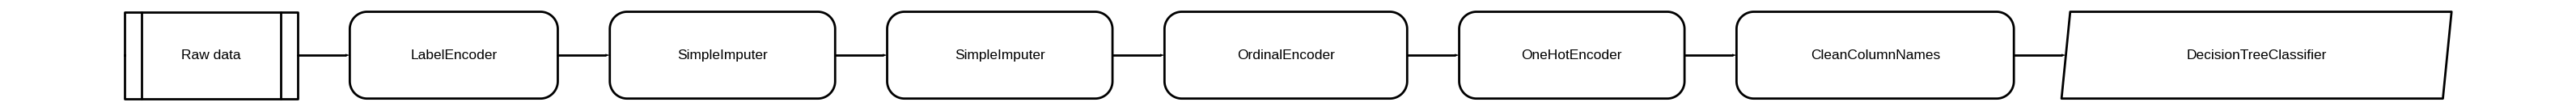

In [ ]:
# plot class report
plot_model(best, plot = 'pipeline')

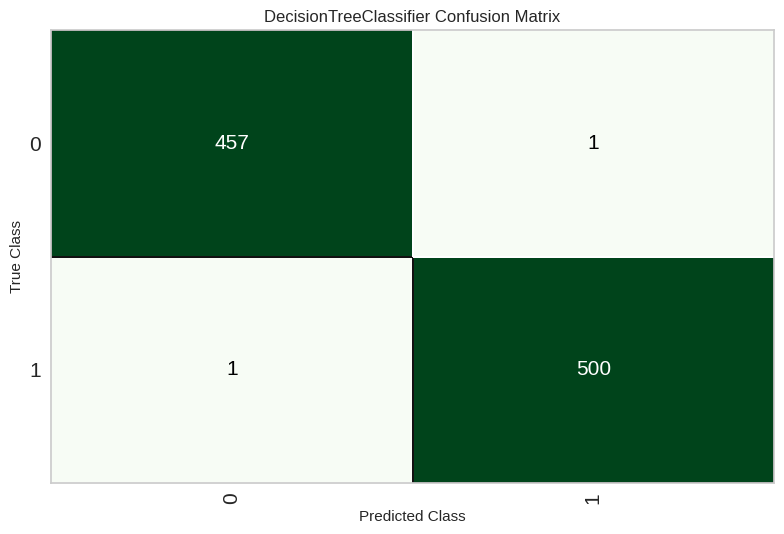

In [ ]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

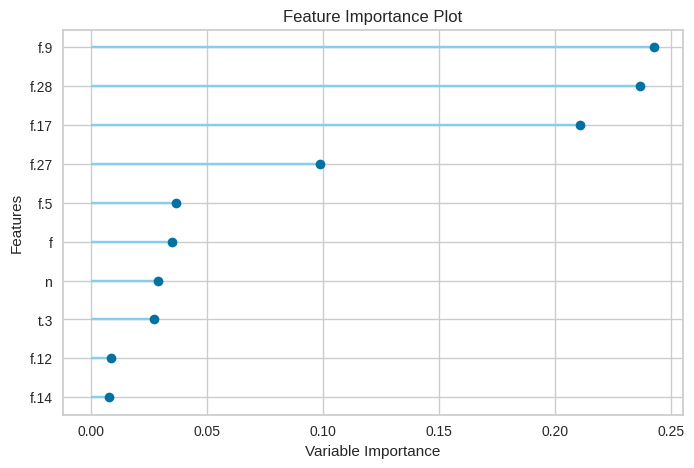

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

In [ ]:
evaluate_model(best)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# predict on test set
t_pred = predict_model(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Decision Tree Classifier,0.9969,0.9969,0.9969,0.9969,0.9969,0.9937,0.9937


In [ ]:
# show predictions df
t_pred.head()

,f,f.1,f.2,f.3,f.4,f.5,f.6,f.7,f.8,f.9,...,f.25,f.26,f.27,f.28,t.2,t.3,n.1,won,prediction_label,prediction_score
183,t,f,f,f,t,t,t,f,t,f,...,f,f,f,f,t,t,n,won,won,1.0
3123,f,f,f,t,t,t,f,f,t,f,...,t,f,f,t,f,t,t,nowin,nowin,1.0
1877,f,f,f,f,f,t,t,f,f,f,...,f,f,f,f,t,f,n,won,won,1.0
1440,f,f,f,f,f,t,f,f,f,t,...,f,f,f,f,t,t,n,nowin,nowin,1.0
535,f,f,f,f,f,f,f,f,f,f,...,f,f,f,f,t,t,n,won,won,1.0
